# Social Computing/Social Gaming - Summer 2021

# Exercise Sheet 2: A comparison of Centrality Measures
Centrality is a key concept in social network analysis. It measures the importance or influence of a certain node/edge in a network. The interpretation of importance or influence, however, depends on the type of centrality and the application. Different types of centrality were discussed in the lecture: degree centrality, closeness centrality, betweenness centrality and eigenvector centrality.<br>
In this exercise, you are going to implement different centrality algorithms using the NetworkX library which you already know from last exercise. Please consult the [reference](https://networkx.github.io/documentation/stable/reference/index.html) [1] and the [tutorial](https://networkx.github.io/documentation/stable/tutorial.html) [2].

In [1]:
# import the libraries
import networkx as nx, pandas as pd, matplotlib.pyplot as plt

## Task 2.1: The Krackhardt Kite Graph
We will use the Krackhardt Kite for the first exercise. The Krackhardt Kite is a simply connected, unweighted, and undirected graph. [This figure](https://en.wikipedia.org/wiki/Krackhardt_kite_graph#/media/File:Krackhard_kite.PNG) [3] illustrates the Krackhardt Kite.

**Calculate and print the degree centrality of the Krackhardt Kite graph - just a list of ten values, one for each node. You can use the pre-defined function of the NetworkX library.**

**Optional:** Look at the graph and the list with the degree centrality values. Can you identify which node has which degree centrality?<br>
**Optional:** Calculate the closeness and betweeness centrality as well using the library. What information do they give us compared to degree centrality?

Degree centrality: [0.4444444444444444, 0.4444444444444444, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.5555555555555556, 0.5555555555555556, 0.3333333333333333, 0.2222222222222222, 0.1111111111111111]
Closeness centrality: {0: 0.5294117647058824, 1: 0.5294117647058824, 2: 0.5, 3: 0.6, 4: 0.5, 5: 0.6428571428571429, 6: 0.6428571428571429, 7: 0.6, 8: 0.42857142857142855, 9: 0.3103448275862069}
Betweenness centrality: {0: 0.023148148148148143, 1: 0.023148148148148143, 2: 0.0, 3: 0.10185185185185183, 4: 0.0, 5: 0.23148148148148148, 6: 0.23148148148148148, 7: 0.38888888888888884, 8: 0.2222222222222222, 9: 0.0}


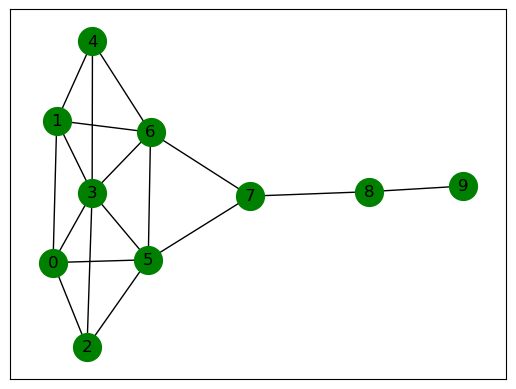

In [112]:
# Importing the graph (connected, unweighted, undirected social network)
krackhardt_kite = nx.krackhardt_kite_graph()
# Formatting the graph
nodeColor = "green"
nodeSize = 400
pos = nx.spring_layout(krackhardt_kite)

# TODO: Calculate and print the Kite's degree centrality
print("Degree centrality:", list(nx.degree_centrality(krackhardt_kite).values()))

# Optional: Calculate the closeness centrality
print("Closeness centrality:", nx.closeness_centrality(krackhardt_kite))

# Optional: Calculate the betweeness centrality
print("Betweenness centrality:", nx.betweenness_centrality(krackhardt_kite))

# TODO: Plot the graph. In the following, use draw_networkx instead of draw!
nx.draw_networkx(krackhardt_kite, node_color=nodeColor, node_size=nodeSize, pos=pos)

## Task 2.2: Betweenness Centrality

(shortest Path) Betweenness Centrality measures centrality based on shortest paths. For every pair of vertices in a graph, there exists a shortest path between the vertices such that either the number of edges that the path passes through (for undirected graphs) or the sum of the weights of the edges (for directed graphs) is minimized.<br>
Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

**a)**
**Write a Python program that computes the betweeness centrality for each node for the given university social network.** The output should be a list where each item contains the value of the betweenness centrality of a node. You are **not allowed** to use the pre-defined function `betweenness_centrality()` from NetworkX , but you can look up its [documentation](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html) [4] for help or use it for comparison.

**Notes:**
* The program only have to implement the undirected graph version (without edge weights)
* Look up the mathematical expression in the documentation
* Normalize your centrality values
* You are allowed to use pre-defined functions from NetworkX for determining (shortest) paths

In [245]:
# TODO: Calculate and print the betweenness centrality

def one_frac(n, all_dict, s, t, v):
    with_node = 0 # numerator
    full = 0 # denominator sigma
    
    # counting one term of the sum
    for j in all_dict[s]:
        if (j[0]==s) and (j[-1]==t):
            full+=1
            if v in j:
                with_node +=1
    if v==s or v==t:
        with_node=0       
    return ((with_node/full) if full else 0)

def betweenness_centrality(g):
    
    glist = nx.to_dict_of_lists(g)
    n = len(glist.keys())
    gen_shp = []
    spec_shp = 0
    all_dict = {}
    
    # making a list of all shortest paths for all nodes
    for i in g:
        for j in g:
            if i!=j:
                for a in nx.all_shortest_paths(g, i, j):
                    gen_shp.append(a)
        all_dict[i] = gen_shp
        gen_shp = []
    
    #print(all_dict)
    accum = 0
    res = {}
    # iterating over all nodes
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i!=j:
                    a = one_frac(n, all_dict, i, j, k)
                    accum += a
        # normalization
        # we're not multiplying the numerator by two like in the formula because the graph is undirected
        # but the all_dict features every path two times -- for each beginning/end node
        res[k] = accum/((n-1)*(n-2))
        accum = 0
    
    print("Resulting centrality dictionary:", res)
   
    return res
    

# Calculate and print betweenness centrality
bc = betweenness_centrality(krackhardt_kite)
nx_bc = nx.betweenness_centrality(krackhardt_kite)

for key in nx_bc.keys():
    print("%.3f %.3f" %(bc[key], nx_bc[key]))

Resulting centrality dictionary: {0: 0.023148148148148147, 1: 0.023148148148148147, 2: 0.0, 3: 0.10185185185185183, 4: 0.0, 5: 0.23148148148148145, 6: 0.23148148148148145, 7: 0.3888888888888889, 8: 0.2222222222222222, 9: 0.0}
0.023 0.023
0.023 0.023
0.000 0.000
0.102 0.102
0.000 0.000
0.231 0.231
0.231 0.231
0.389 0.389
0.222 0.222
0.000 0.000


Now you have implemented Betweenness Centrality, copy your solution and try to change your code in the following way:


**b)**
**Write a Python program that computes the Epsilon-Betweeness-Centrality for each node for the given social network. Definition of Epsilon-Betweeness-Centrality: if a path is longer by $\epsilon$ than the shortest path, it is still considered a valid path for the computation of the betweenness centrality of a node**

**Notes:**
* All notes from above still apply
* This time only shortest paths are not sufficient to compute the centrality, maybe NetworkX can help you once more?
* Consider only $\epsilon$-longer paths that do not contain the same node more than once

In [246]:
# TODO: Calculate and print the betweenness centrality with epsilon
# Hint: You can use your code from above and modify it accordingly

def one_frac(n, all_dict, s, t, v):
    with_node = 0 # numerator
    full = 0 # denominator sigma
    
    # counting one term of the sum
    for j in all_dict[s]:
        if (j[0]==s) and (j[-1]==t):
            full+=1
            if v in j:
                with_node +=1
    if v==s or v==t:
        with_node=0       
    return ((with_node/full) if full else 0)

def betweenness_centrality(g, func, eps=0):
    
    glist = nx.to_dict_of_lists(g)
    n = len(glist.keys())
    gen_shp = []
    spec_shp = 0
    all_dict = {}
    
    # making a list of all shortest paths for all nodes
    for i in g:
        for j in g:
            if i!=j:
                shortest_path_length = nx.shortest_path_length(g,i,j)
                diff = (shortest_path_length + eps + 1)
                for a in func(g, i, j):
                    if len(a) <= diff:
                        gen_shp.append(a)
        all_dict[i] = gen_shp
        gen_shp = []
    
    #print("paths:",all_dict)
    accum = 0
    res = {}
    # iterating over all nodes
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i!=j:
                    a = one_frac(n, all_dict, i, j, k)
                    accum += a
        # normalization
        # we're not multiplying the numerator by two like in the formula because the graph is undirected
        # but the all_dict features every path two times -- for each beginning/end node
        res[k] = accum/((n-1)*(n-2))
        accum = 0
    
    print("Resulting centrality dictionary:", res)
   
    return res



def betweenness_centrality_epsilon(g, epsilon):
    return betweenness_centrality(g, nx.all_simple_paths, eps=epsilon)
    
# Calculate and print betweenness centrality
epsilon = 1
bc_epsilon = betweenness_centrality_epsilon(krackhardt_kite, epsilon)

print("Epsilon no. 1 is:", epsilon)
for val in bc_epsilon:
    print("EBC of node ", val, " is : %.3f" %(bc_epsilon[val]))
    
epsilon_2 = 4
bc_epsilon_2 = betweenness_centrality_epsilon(krackhardt_kite, epsilon_2)

print("Epsilon is:", epsilon_2)
for val in bc_epsilon_2:
    print("EBC of node ", val, " is : %.3f" %(bc_epsilon_2[val]))

Resulting centrality dictionary: {0: 0.11680996472663138, 1: 0.11680996472663138, 2: 0.06257716049382717, 3: 0.3235449735449733, 4: 0.06257716049382717, 5: 0.37221119929453267, 6: 0.3722111992945327, 7: 0.4083333333333333, 8: 0.2222222222222222, 9: 0.0}
Epsilon no. 1 is: 1
EBC of node  0  is : 0.117
EBC of node  1  is : 0.117
EBC of node  2  is : 0.063
EBC of node  3  is : 0.324
EBC of node  4  is : 0.063
EBC of node  5  is : 0.372
EBC of node  6  is : 0.372
EBC of node  7  is : 0.408
EBC of node  8  is : 0.222
EBC of node  9  is : 0.000
Resulting centrality dictionary: {0: 0.5573872788889277, 1: 0.5573872788889276, 2: 0.3378730562459917, 3: 0.7571429656207095, 4: 0.3378730562459917, 5: 0.7096425610054569, 6: 0.7096425610054568, 7: 0.4854951878136057, 8: 0.2222222222222222, 9: 0.0}
Epsilon is: 4
EBC of node  0  is : 0.557
EBC of node  1  is : 0.557
EBC of node  2  is : 0.338
EBC of node  3  is : 0.757
EBC of node  4  is : 0.338
EBC of node  5  is : 0.710
EBC of node  6  is : 0.710
EBC 

**c)** Compare your different results from a) and b). Pick 2 nodes and explain why their values differ. What advantages and disadvantages does one approach have over the other?

**TODO: Describe your observations in 3-5 sentences**

As epsilon increases, so does the centrality. For example, with epsilon = 0 the centralities of node 2 and 3 are the same as with BC (=0.00), but with epsilon = 1 the centrality has increased (=0.063). They're also increasing simultaneously because the graph is symmetrical. The centrality of node 9 won't increase no matter what because in order for a path to go through it, it would also have to visit node 8 twice and we agreed to not consider those paths. 

One advantage would be that we can still "reach" a node if for some reason the shortest path becomes unavailable (someone dies, etc) -- because, in general, "resources don't follow the shortest path only". The disadvantage is that the higher epsilon is the more unrealistic the simulation (people generally take the most direct route when trying to contact someone).

## Task 2.3: PageRank

This task is about **PageRank centrality**. It is a feedback-centrality named after Larry Page, who together with Sergei Brin founded Google. The PageRank algorithm was used in Google's search engine to rank the pages for the search result. Since 2013, PageRank was superseded by the Hummingbird algorithm although PageRank remains one of many ingredients in the Hummingbird algorithm. Its basic idea is that a node is more central the more central its neighbors are. In order to understand PageRank, the concept of a random walk is required.

The **random walk** model describes a user surfing the web, starting at a web page and randomly following one of its hyperlinks to other web pages. If there is no link to other pages, the surfer jumps to a random web page.

The PageRank measures a stationary distribution of a specific kind of random walk that starts from a random vertex, jumps to a random vertex with a predefined probability $1-d$, and with a probability $d$ follows a random outgoing edge of the current vertex.

**a)** First create a graph and test out the pre-defined NetworkX PageRank function.

**1. Create** a graph using ``erdos_renyi_graph`` function of NetworkX.

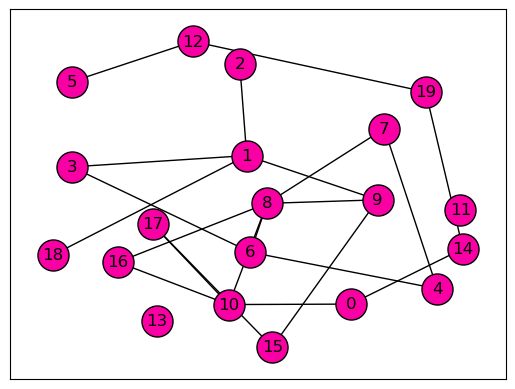

In [506]:
# TODO: Create a graph using Erdos_Renyi with the following parameters
n = 20
p = 0.07
directed = True

simple_graph = nx.erdos_renyi_graph(n,p,directed)

# Formatting the graph
node_color = "#F900A5"
edge_colors= "#000000"
node_size = 500

pos = nx.spring_layout(simple_graph, k=0.7, iterations=20)

nx.draw_networkx(simple_graph, pos=pos, node_color=node_color, node_size=node_size, edgecolors=edge_colors, with_labels=True)

**2.** **Calculate the PageRank** values of our `simple_graph`, using the built-in function of NetworkX.

**3. Print** the first 20 elements of the PageRank.

In [507]:
# use this values for the built-in function
ITERATIONS = 100
DAMPING = 0.85


# TODO: calculate PageRank
pr = nx.pagerank(simple_graph, alpha=DAMPING, max_iter=ITERATIONS)

# TODO: print the results
print("Graph page rank:", pr)

Graph page rank: {0: 0.048284755502676496, 1: 0.09401037322402651, 2: 0.028174082694216562, 3: 0.04626772144237121, 4: 0.04507370257824162, 5: 0.03435551924351722, 6: 0.06385956688025496, 7: 0.04419593921572273, 8: 0.09907675388821002, 9: 0.06442792553040429, 10: 0.08291086757019842, 11: 0.008196721311475412, 12: 0.06154694331095628, 13: 0.008196721311475412, 14: 0.05286649682534015, 15: 0.045672163402095865, 16: 0.04265854250198558, 17: 0.045226391918640356, 18: 0.028174082694216562, 19: 0.05682472895397461}


**b)** Create a simple PageRank function using **Jacobi power iteration**, which you can find in the lecture slides. To avoid matrix inversion we use an iterative formula for the PageRank algorithm:

$$c_i^{(k+1)} = d \cdot \sum_{j} P_{ij}c_{j}^{(k)} + \frac{(1 - d)}{N}$$

where the superscript k denotes the iteration index, d the damping, N the number of nodes in our graph (which is left out in the lecture notes and also in the original papers, but is used in the built-in PageRank calculation algorithm of NetworkX).

**1.** Your first task is to **implement a function** which calculates the transition matrix element $P_{ij}$.

**Note:** If the out-degree of a node is 0, the user should make a "random jump"

In [551]:
# TODO: calculate the transition matrix element P_ij of a node j to a node i.
from random import randrange, uniform
def pij(g, i, j, d):
    '''
    calculate transition matrix element 
    between node i and node j of graph g 
    '''
    pij = 0
    # TODO: implement the function
    un = uniform(1, g.number_of_nodes())
    if not g.degree(j):
        pij = 1/un
    else:
        if (i,j) in g.edges():
            pij = (d/g.degree(j) + (1-d)/un)
    
    return pij
            

**2.** The second task is to **normalize** a list, so that `sum(list) = 1.0` after every iteration in the Jacobi power iteration algorithm.

In [552]:
# TODO: renormalize after every step
def renormalize(pagerank_list):
    '''
    input arbitrary float number list
    return a list where of all elements (sum(list)) equals 1.0
    '''
    # TODO: implement the function
    norm = [i/sum(pagerank_list) for i in pagerank_list]
    return norm

**3.** The third and last task is to **implement the PageRank** calculation using Jacobi power iteration yourself. **Print** the first 20 elements and make sure you have the same result as in task ***a)***.

**Note:**
- `summe_j` is the term $\sum_j P_{ij}c_{j}^{k}$ in the formula

In [553]:
def calcPageRank(g, d, numIter=30):
    '''
    calculate the PageRank of a given graph g, with damping d, 
    number of iterations numIter using jacobi power iteration
    return a list with pageranks.
    '''
    # first initialize our pagerank centrality list c 
    # with 1/N for each element
    N = g.number_of_nodes()
    val = 1/N
    c = [val for e in range(N)]
    
    for iteration in range(0, numIter):
        
        c_previous = c.copy() 

        for i in g.nodes:
            summe_j = 0.0
            for j in g.nodes: # for neighbors of i
                # calculate the sum term
                summe_j += (pij(g, i, j, d)*c_previous[j])
            
            # calculate the centrality for the index i
            # using the complete formula   
            c[i] = ((d * summe_j) + ((1-d)/N))
        
        # renormalize pageranks after every iteration
        c = renormalize(c)
            
    return c

my_pagerank_list = calcPageRank(simple_graph, DAMPING, ITERATIONS)
pagerank_dict = nx.pagerank(simple_graph, alpha=DAMPING, max_iter=ITERATIONS)

for key in range(20):
    print("Node", key, "PRS is : %.6f %.6f" %( pagerank_dict[key], my_pagerank_list[key]))

Node 0 PRS is : 0.048285 0.046539
Node 1 PRS is : 0.094010 0.091906
Node 2 PRS is : 0.028174 0.028506
Node 3 PRS is : 0.046268 0.047598
Node 4 PRS is : 0.045074 0.045968
Node 5 PRS is : 0.034356 0.038445
Node 6 PRS is : 0.063860 0.059117
Node 7 PRS is : 0.044196 0.040945
Node 8 PRS is : 0.099077 0.104890
Node 9 PRS is : 0.064428 0.065889
Node 10 PRS is : 0.082911 0.078617
Node 11 PRS is : 0.008197 0.012616
Node 12 PRS is : 0.061547 0.053322
Node 13 PRS is : 0.008197 0.013089
Node 14 PRS is : 0.052866 0.046958
Node 15 PRS is : 0.045672 0.046604
Node 16 PRS is : 0.042659 0.043353
Node 17 PRS is : 0.045226 0.050542
Node 18 PRS is : 0.028174 0.034355
Node 19 PRS is : 0.056825 0.050742


**c) Personalized PageRank**

Now that you have calculated the PageRank centrality you will enhance the PageRank calculation to the Personalized PageRank. 

Personalized PageRank is a modification of the PageRank algorithm. It is basically the same but biased to a personalized set of the starting vertices, a so-called `personalization` or preferences vector of the user.

Instead of jumping to a random vertex with probability $d$, the walker jumps to a random vertex from the set of the starting vertices. By varying the damping factor $d$ the algorithm can be adjusted either towards the structure of the network itself, by using a close to 1 value of $d$, or towards the personal preferences by making $d$ smaller. Personalized PageRank can be used for personalized recommendations.

**Copy and modify the ``calcPageRank()`` function, in order to include personal preferences. You have to modify the starting vector and the formula slightly. In addition to that `pij()` must be corrected for the personal jump too, define `pij_pers()` in order for your personalized PageRank to work!**

In [543]:
# TODO calculate the transition matrix element P_ij of a node j to a node i.
def pij_pers(g, i, j, d, c_start):
    '''
    calculate transition matrix element 
    between node i and node j of graph g 
    '''
    # TODO: implement the function

    pij = 0
    sub = g.subgraph([*range(c_start, g.number_of_nodes(), 1)])
    # TODO: implement the function
    un = uniform(1, sub.number_of_nodes())
    if not g.degree(j):
        pij = 1/un
    else:
        if (i,j) in g.edges():
            pij = (d/g.degree(j) + (1-d)/un)
    
    return pij

def calcPageRank(g, d, pref_vec, numIter=30):
    '''
    calculate the PageRank of a given graph g, with damping d, 
    number of iterations numIter using jacobi power iteration
    return a list with pageranks.
    '''
    # first initialize our pagerank centrality list c 
    # with 1/N for each element
    N = g.number_of_nodes()
    ent = 0
    for i in pref_vec:
        if pref_vec[i]:
            ent+=1
    val = 1/N
    val2 = 1/ent
    c = [val for e in range(N)]

    for k in pref_vec:
        if pref_vec[k]:
            c[k] = val2

    for iteration in range(0, numIter):
        
        c_previous = c.copy() 

        for i in g.nodes:
            summe_j = 0.0
            for j in g.nodes: # for neighbors of i
                # calculate the sum term
                if i in pref_vec:
                    summe_j += (pij_pers(g, i, j, d, pref_vec[i])*c_previous[j])
                else:
                    summe_j += (pij_pers(g, i, j, d, 0)*c_previous[j])
            
            # calculate the centrality for the index i
            # using the complete formula   
            c[i] = ((d * summe_j) + ((1-d)/N))
        
        # renormalize pageranks after every iteration
        # c = [((1-d)*val+d/N) for val in c]
        c = renormalize(c)
            
    return c



In [544]:
def personalizedPageRank(g, d, personalization, numIter=30):
    '''
    calculate the personalized pagerank of a given graph g, with damping d, 
    number of iterations numIter using jacobi power iteration
    return a list with pageranks.
    
    personalization is the personalization dictionary of nodes, with 
    the probability 1, if node is personal preference of a user, 
    0, if not. E.g. {0:1, 1:1, 2:0, 3:1, 4:0, 5:0}, for prefered pages 1 and 3.
    '''
    # first initialise our PageRank centrality list c 
    # with 1/"number of non zero entries in personalization dictionary" 
    # for each prefered page
    # Note: the initial centrality list c_start is also needed for your pij_pers() function

    # TODO: Implement personalized PageRank

    return calcPageRank(g, d, personalization, numIter)

personalization_vector = {1:0, 2:1, 3:1, 4:1, 5:0, 6:1}

my_personalized_pagerank = personalizedPageRank(simple_graph, DAMPING, personalization_vector, ITERATIONS)
personalized_pagerank = nx.pagerank(simple_graph, alpha=DAMPING, personalization=personalization_vector, max_iter=ITERATIONS)

for key in range(20):
    print("%.6f %.6f" %( personalized_pagerank[key], my_personalized_pagerank[key]))

0.012341 0.050820
0.151702 0.084517
0.069737 0.033045
0.111873 0.045629
0.106698 0.044985
0.001178 0.036001
0.148719 0.067140
0.063673 0.043968
0.107804 0.098835
0.061693 0.060569
0.044045 0.086062
0.000000 0.010792
0.002768 0.056552
0.000000 0.009804
0.007011 0.054842
0.026187 0.040670
0.027686 0.055210
0.020489 0.043454
0.032237 0.025957
0.004159 0.051147


**d)** Describe in 3-4 sentences what happens if you modify the starting vector or the damping factor? How does it influence your recommendation?

**TODO: Describe your observations in 3-4 sentences**

## References

[1] https://networkx.github.io/documentation/stable/reference/index.html
<br>[2] https://networkx.github.io/documentation/stable/tutorial.html
<br>[3] https://en.wikipedia.org/wiki/Krackhardt_kite_graph#/media/File:Krackhard_kite.PNG
<br>[4] https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html